In [1]:

#EDA have been done for top  cases and z is varible with number used so that i can knw how many steps did i used for doing eda.


import pandas as pd
data1=pd.read_excel(r"C:\Users\User\Downloads\Sir notes\COVID-19-geographic-disbtribution-worldwide.xlsx")


In [3]:
data=data1.copy()

#data=data.sort_values(['deaths'],ascending=False)

data.corr()
import seaborn as sb

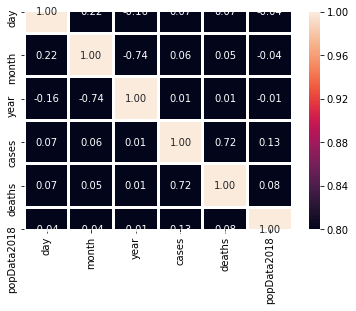

In [4]:
#data=data.rename(columns={'popData2018':"Data2018"})

#used heatmap to see relationship between vriables
heatmap=sb.heatmap(data.corr(),annot=True,vmin=.8,fmt=".2f",linewidths=2,square=False)

In [5]:
#changed  NAME just for practise
data.rename(columns={'popData2018':"POP2018"})

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,POP2018
0,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
1,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
2,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
7510,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
7511,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
7512,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
7513,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [6]:
data.corr()

,day,month,year,cases,deaths,popData2018
day,1.000000,0.218654,-0.155735,0.070408,0.066582,-0.044911
month,0.218654,1.000000,-0.740910,0.062498,0.053325,-0.041031
year,-0.155735,-0.740910,1.000000,0.012523,0.010030,-0.006629
cases,0.070408,0.062498,0.012523,1.000000,0.722999,0.128535
deaths,0.066582,0.053325,0.010030,0.722999,1.000000,0.076304
popData2018,-0.044911,-0.041031,-0.006629,0.128535,0.076304,1.000000


In [7]:

#segregating variables
continuous_feature=[feature for feature in data.columns if data[feature].dtype!=object]
categorial_feature=[feature for feature in data.columns if data[feature].dtype==object]

#both Categorical_feature and Ordinal_feature have same variables
ordinal_feature=[feature for feature in categorial_feature if len(data[feature].unique())>=2]


#z1 tells total country 
z1=len(data1["countriesAndTerritories"].unique())

#As i dont have any use of these variables i wont use it they might cause multicollinearity.
z=data.drop(['geoId','countryterritoryCode'],axis=1,inplace=True)
data.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2018'],
      dtype='object')

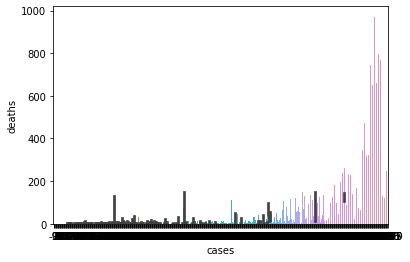

In [9]:
import seaborn as sb
sb.barplot(x="cases",y="deaths",data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

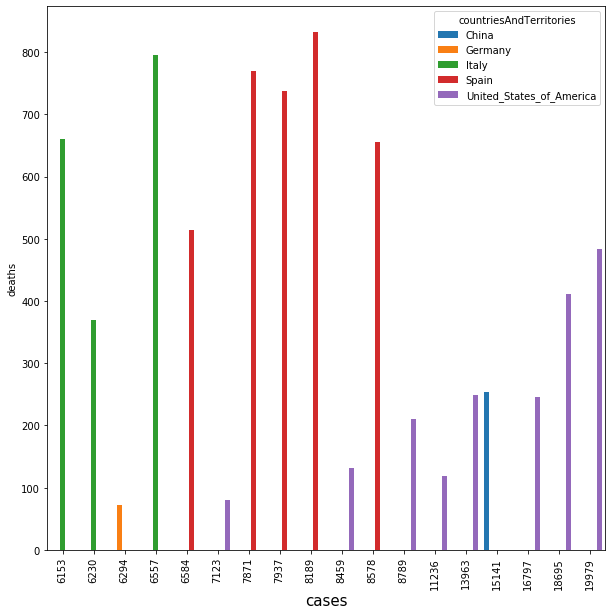

In [10]:

#searched for those countries havng deaths more thn 300 to make barchart more clear and to the surprise china is not there.

z4=data.query("cases>6000")

import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,10))
sb.barplot(x="cases",y="deaths",hue="countriesAndTerritories",data=z4,saturation=.95)
plt.xlabel("cases",fontsize=15)
plt.xticks(rotation= 90)

In [11]:
#searched for the requred dates where corona was in peak.
df = data.set_index(data['dateRep'])
z5=df.loc["2020-03-16":"2020-03-29"]

In [12]:
z6_china=data[(data['dateRep'] > '2020-03-16 00:00:00') & (data['dateRep'] <= '2020-03-29 00:00:00') & (data['countriesAndTerritories'] == 'China') ].deaths.sum() 

z6_italy=data[(data['dateRep'] > '2020-03-16 00:00:00') & (data['dateRep'] <= '2020-03-29 00:00:00') & (data['countriesAndTerritories'] == 'Italy') ].deaths.sum() 

z6_spain=data[(data['dateRep'] > '2020-03-16 00:00:00') & (data['dateRep'] <= '2020-03-29 00:00:00') & (data['countriesAndTerritories'] == 'Spain') ].deaths.sum() 

z6_usa=data[(data['dateRep'] > '2020-03-16 00:00:00') & (data['dateRep'] <= '2020-03-29 00:00:00') & (data['countriesAndTerritories'] == 'United_States_of_America') ].deaths.sum() 

z6_others=data.query(' dateRep >= "2020-03-16 00:00:00" and dateRep <= "2020-03-29 00:00:00"  and countriesAndTerritories!= "United_States_of_America" and  countriesAndTerritories!= "China" and countriesAndTerritories!= "Italy" and  countriesAndTerritories !="Spain"  ' ).deaths.sum()

In [52]:
#  taking only rows with values that are not nulll.

z7=data.query('cases>1 and deaths>1')


z9_total_cases=z7.cases.sum()
z9_total_deaths=data.deaths.sum()

#percentage of dealth all over world
china_perc_dealth=z6_china/z9_total_deaths*100
usa_perc_dealth=z6_usa/z9_total_deaths*100
spain_perc_dealth=z6_spain/z9_total_deaths*100
italy_perc_dealth=z6_italy/z9_total_deaths*100


print("china_perc_dealth is {:,.3f}{}usa_perc_dealth is {:,.3f}{}spain_perc_dealth is {:,.3f}{}italy_perc_dealth is {:,.3f}".format(china_perc_dealth,"\n",usa_perc_dealth,"\n",spain_perc_dealth,"\n",italy_perc_dealth))


china_perc_dealth is 0.292
usa_perc_dealth is 6.969
spain_perc_dealth is 17.740
italy_perc_dealth is 26.968


In [62]:
#getting no. of cases according to our wish

z10=data.groupby('countriesAndTerritories')
belgium_cases=z10.get_group('Belgium').cases.sum()

##getting no. of total cases automatically for all country using list comp
z_cases_world=[(z10.get_group(i).cases.sum(),i) for i in data["countriesAndTerritories"].unique()]
z_cases_world=pd.DataFrame(z_cases_world)
z_cases_world.head()


,0,1
0,106,Afghanistan
1,4,Angola
2,197,Albania
3,308,Andorra
4,7,Antigua_and_Barbuda


In [69]:
#or simply using groupby

z11=data.groupby('countriesAndTerritories').cases.sum()



z11_perc_growth=(data.groupby('countriesAndTerritories').cases.sum()-data.groupby('countriesAndTerritories').cases.first())/100
z11_perc_growth=pd.DataFrame(z11_perc_growth)
z11_perc_growth.head()




,cases
countriesAndTerritories,
Afghanistan,0.91
Albania,1.86
Algeria,3.05
Andorra,2.67
Angola,0.04


In [70]:
highest_percentage=z11_perc_growth.nlargest(4,columns='cases',keep='last')

print(highest_percentage)

                            cases
countriesAndTerritories          
United_States_of_America  1046.86
Italy                      864.98
China                      822.13
Spain                      640.59


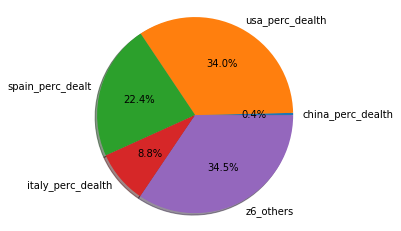

In [71]:
#percentage distribution among themselves using piechart.

import matplotlib.pyplot as plt
labels=["china_perc_dealth",'usa_perc_dealth','spain_perc_dealt','italy_perc_dealth','z6_others']
sizes =[z6_china,z6_italy,z6_spain,z6_usa,z6_others]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


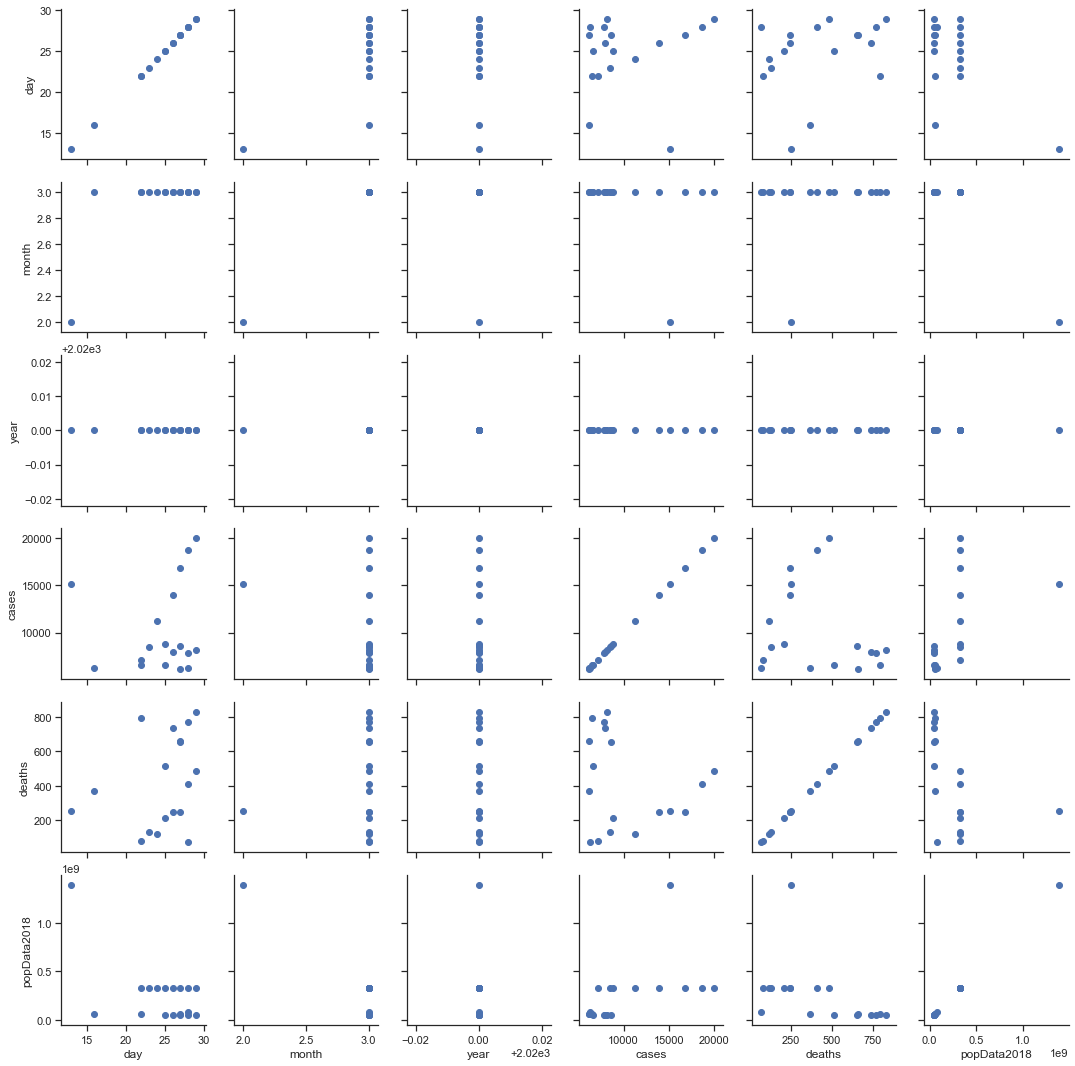

In [73]:
#pair grid

import seaborn as sns
sns.set(style="ticks")
b = sns.PairGrid(z4)
b.map(plt.scatter)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


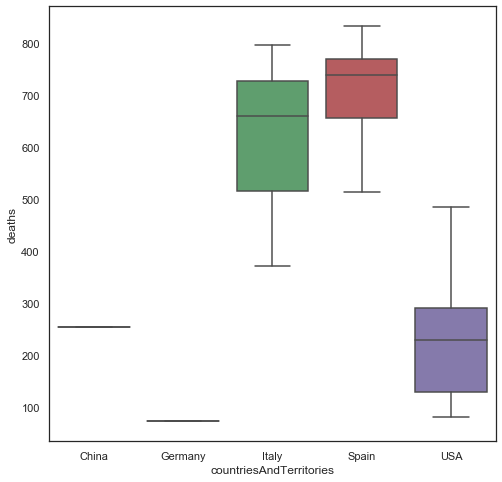

In [74]:

#for better visulization
z4.replace(to_replace ="United_States_of_America",value="USA",inplace=True)

#boxplot for dealths...they are dataset which having cases more thaan 6000
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.set(style="white", color_codes=True)
sns.boxplot(x="countriesAndTerritories", y="deaths", data=z4);

#over that period of time spain was having max dealths 

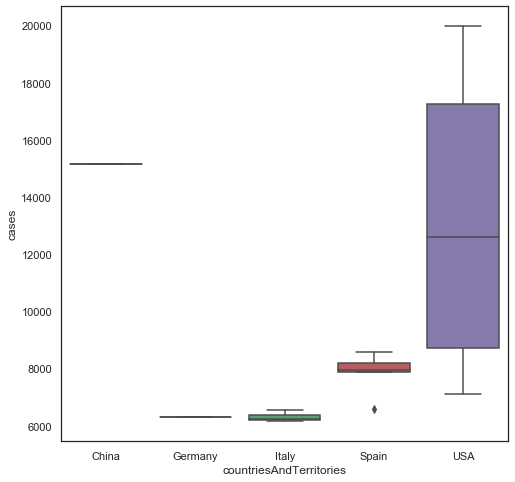

In [75]:


#boxplot for cases
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.set(style="white", color_codes=True)
sns.boxplot(x="countriesAndTerritories", y="cases", data=z4);

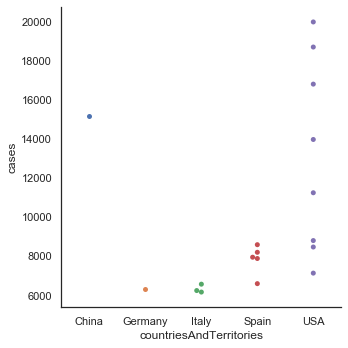

In [76]:
#over that period of time china is having highest cases but its the usa who got different values each day.

#understanding same with catplot
sns.catplot(x="countriesAndTerritories", y="cases", kind="swarm", data=z4);



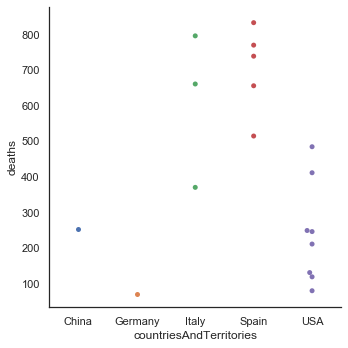

In [77]:
#for deaths
sns.catplot(x="countriesAndTerritories", y="deaths", kind="swarm", data=z4);